In [1]:
import pandas as pd

In [2]:
#importing the dataset as a corpus using the pandas library
data = pd.read_csv('data.csv')
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [3]:
#inspecting the data to see what it looks like
data['Body'][0]

'Image copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Someone obviously missed their shift this morning. — Senator Bo

In [4]:
data['Body'][:7]

0    Image copyright Getty Images\nOn Sunday mornin...
1    LONDON (Reuters) - “Last Flag Flying”, a comed...
2    The feud broke into public view last week when...
3    MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...
4    Country singer Jason Aldean, who was performin...
5    JetNation FanDuel League; Week 4\n% of readers...
6    In 2012, Kansas lawmakers, led by Gov. Sam Bro...
Name: Body, dtype: object

In [5]:
#Looking at the data, there are some missing columns, so let's take care of that
data.fillna('Article unavailable')

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",Article unavailable,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [6]:
#data cleaning with text preprocessing techniques
#data cleaning first round
#using regular expressions and string to clean

import re
import string

In [7]:
#function for first round of data cleaning
def clean_text_round1(text):
    text = str(text).lower() #making all text lowercase
    text = re.sub('\[.*?\]', '', text) #removing full stops and question marks
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #removing digits
    return text

round1 = lambda x: clean_text_round1(x)

In [8]:
#Let's take a look at the updated text
data_clean = pd.DataFrame(data.Body.apply(round1))
data_clean

,Body
0,image copyright getty images\non sunday mornin...
1,london reuters “last flag flying” a comedydra...
2,the feud broke into public view last week when...
3,mexico city reuters egypt’s cheiron holdings ...
4,country singer jason aldean who was performing...
...,...
4004,trends to watch\n of readers think this story ...
4005,trump jr is soon to give a speech for \n of r...
4006,nan
4007,shanghai reuters china said it plans to accep...


In [9]:
#let's apply a second round of cleaning because some nonsensical text was ignored in the first clean
def clean_text_round2(text):
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [10]:
#let's take a look at the updated text again
data_clean = pd.DataFrame(data_clean.Body.apply(round2))
data_clean['Body'][0]

'image copyright getty imageson sunday morning donald trump went off on a twitter tirade against a member of his own partythis in itself isnt exactly huge news its far from the first time the president has turned his rhetorical cannons on his own ranksthis time however his attacks were particularly biting and personal he essentially called tennessee senator bob corker the chair of the powerful senate foreign relations committee a coward for not running for reelectionhe said mr corker begged for the presidents endorsement which he refused to give he wrongly claimed that mr corkers support of the iranian nuclear agreement was his only political accomplishmentunlike some of his colleagues mr corker  free from having to worry about his immediate political future  didnt hold his tongueskip twitter post by senbobcorker its a shame the white house has become an adult day care center someone obviously missed their shift this morning — senator bob corker senbobcorker october   reportthat wasnt 

In [11]:
#Concatenating our cleaned data to our corpus
data['clean_body'] = data_clean
data['clean_body'][0]

'image copyright getty imageson sunday morning donald trump went off on a twitter tirade against a member of his own partythis in itself isnt exactly huge news its far from the first time the president has turned his rhetorical cannons on his own ranksthis time however his attacks were particularly biting and personal he essentially called tennessee senator bob corker the chair of the powerful senate foreign relations committee a coward for not running for reelectionhe said mr corker begged for the presidents endorsement which he refused to give he wrongly claimed that mr corkers support of the iranian nuclear agreement was his only political accomplishmentunlike some of his colleagues mr corker  free from having to worry about his immediate political future  didnt hold his tongueskip twitter post by senbobcorker its a shame the white house has become an adult day care center someone obviously missed their shift this morning — senator bob corker senbobcorker october   reportthat wasnt 

In [12]:
data[:10]

,URLs,Headline,Body,Label,clean_body
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,image copyright getty imageson sunday morning ...
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,london reuters “last flag flying” a comedydra...
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,the feud broke into public view last week when...
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,mexico city reuters egypt’s cheiron holdings ...
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,country singer jason aldean who was performing...
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0,jetnation fanduel league week of readers thin...
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1,in kansas lawmakers led by gov sam brownback ...
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1,the reserve bank of india rbi governor urjit p...
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1,scott pruitt administrator of the us environme...
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1,file photo an air berlin sign is seen at an a...


In [48]:
import nltk
from nltk.corpus import stopwords

sw = stopwords.words('english')
data['clean_body'] = data['clean_body'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#deleting sparse words
sil = pd.Series(" ".join(data['clean_body']).split()).value_counts()[-1000:]
data['clean_body'] = data['clean_body'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [ ]:
#word lemmatization
#from textblob import Word
#data['clean_body'] = data['clean_body'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [49]:
real_text = ' '.join(data[data['Label'] == 1]['clean_body'])
fake_text = ' '.join(data[data['Label'] == 0]['clean_body'])
fake_words = [word for word in nltk.tokenize.word_tokenize(fake_text) if word not in stopwords.words('english') and len(word) > 3]
real_words = [word for word in nltk.tokenize.word_tokenize(real_text) if word not in stopwords.words('english') and len(word) > 3]

common_fake = nltk.FreqDist(fake_words).most_common(25)
common_real =nltk.FreqDist(real_words).most_common(25)

In [50]:
common_fake

[('game', 1743),
 ('week', 1514),
 ('would', 1479),
 ('also', 1412),
 ('first', 1399),
 ('like', 1382),
 ('season', 1284),
 ('time', 1091),
 ('said', 1055),
 ('last', 1038),
 ('yards', 976),
 ('content', 965),
 ('people', 963),
 ('could', 960),
 ('going', 957),
 ('even', 938),
 ('back', 927),
 ('ravens', 885),
 ('team', 879),
 ('play', 836),
 ('think', 819),
 ('state', 811),
 ('many', 796),
 ('fact', 766),
 ('make', 760)]

In [51]:
common_real

[('said', 7173),
 ('would', 2578),
 ('also', 1932),
 ('trump', 1803),
 ('people', 1788),
 ('world', 1551),
 ('president', 1528),
 ('first', 1509),
 ('like', 1381),
 ('last', 1373),
 ('could', 1355),
 ('time', 1347),
 ('caption', 1264),
 ('told', 1246),
 ('year', 1168),
 ('years', 1124),
 ('photos', 1061),
 ('government', 1043),
 ('united', 986),
 ('reuters', 970),
 ('york', 967),
 ('october', 953),
 ('continue', 951),
 ('states', 936),
 ('many', 929)]

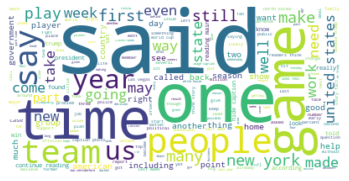

In [90]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

#creating the wordcloud
cloud_text = " ".join(article for article in data.clean_body)

#Create cloud image
wordcloud = WordCloud(background_color='white').generate(cloud_text)

#displaying the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
#lets get the sentiments of the articles to see if it plays a crucial role in the news type
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['clean_body'].apply(pol)
data['subjectivity'] = data['clean_body'].apply(sub)
data[:19]

,URLs,Headline,Body,Label,clean_body,polarity,subjectivity
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,image copyright getty imageson sunday morning ...,0.097076,0.417664
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,london reuters “last flag flying” comedydrama ...,0.087460,0.382090
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,feud broke public view last week mr corker sai...,0.048445,0.341780
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,mexico city reuters egypt’s cheiron holdings l...,-0.032738,0.273810
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,country singer jason aldean performing las veg...,-0.115909,0.500000
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0,jetnation fanduel league week readers think st...,0.000000,0.337500
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1,kansas lawmakers led gov sam brownback republi...,0.093799,0.462284
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1,reserve bank india rbi governor urjit patel at...,0.044400,0.262600
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1,scott pruitt administrator us environmental pr...,0.117235,0.422727
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1,file photo air berlin sign seen air berlin sto...,0.001199,0.321591


In [60]:
#Extract features and target variables
import numpy as np

X = np.array(data['clean_body'], data['URLs'])     #feature variables
y = np.array(data['Label'])                          #target variable

y = list(map(int, y))

In [61]:
#Split the data into folds
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 2)
kf.get_n_splits(X)

2

In [62]:
#Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [63]:
#create a document-term matrix for the train and test data using tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)        #removing all Englilsh stop words
tf_train = tf.fit_transform(X_train)
tf_test = tf.transform(X_test)

In [64]:
#get feature names
#tf.get_feature_names()

In [65]:
#Now we feed our data into our classifiers to develop our model.
#First we try the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

#training the model
nb.fit(tf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
#predicting
nb_pred = nb.predict(tf_test)
nb_pred[0:10]

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [67]:
#Evaluating the accuracy of the model
nb_score = nb.score(tf_test, y_test)
print('accuracy: %0.3f' % nb_score)

accuracy: 0.927


In [68]:
#Next let's build another model using logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#training the model
lr.fit(tf_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
#predicting
lr_pred = lr.predict(tf_test)
lr_pred[0:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [70]:
#Evaluating the accuracy of the logistic regression model
lr_score = lr.score(tf_test, y_test)
print('accuracy: %0.3f' % lr_score)

accuracy: 0.960


In [71]:
#Using the random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#training the model
rf.fit(tf_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
#predicting
rf_pred = rf.predict(tf_test)
rf_pred[0:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [73]:
#Evaluating the accuracy of the model
rf_score = rf.score(tf_test, y_test)
print('accuracy: %0.3f' % rf_score)

accuracy: 0.922


In [74]:
# We are going to create document-term matrix using the tfidf vectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

#tf = TfidfVectorizer(stop_words = 'english', max_df = 0.7) #removing all english stop words
#data_tf = tf.fit_transform(data_clean.Body)
#data_dtm = pd.DataFrame(data_tf.toarray(), columns = tf.get_feature_names())
#data_dtm.index = data_clean.index
#data_dtm

In [75]:
#let's pickle the data_dtm for future use
#data_dtm.to_pickle("dtm.pkl")

In [76]:
#let's pickle the cleaned data for future use
import pickle

data_clean.to_pickle('data_clean.pkl')
pickle.dump(tf, open('cv.pkl', 'wb'))

In [77]:
#Since the logistic regression model is the most accurate classifier, lets save it and test it with 
#other news articles

#saving the model

with open ('log_model', 'wb') as f:
    pickle.dump(lr, f)

In [78]:
#importing the model and testing

with open ('log_model', 'rb') as f:
    lr_model = pickle.load(f)

In [79]:
#Testing the model with other news articles

In [80]:
text = ["""By MassPrivateI
Editor’s Note: The stages of incrementalism seem to be speeding up. Nicholas West has written for Activist Post just this month about China’s high tech KFC called KPRO turning to facial recognition for payment, as well as a UK supermarket becoming the world’s first to use finger vein scans for its customers. The use of biometrics was, of course, first peddled as a necessary security measure, so we have seen it spread in that capacity from planes to trains and even for event security. Now the cashless agenda can more aggressively make its move for the full roll-out of biometric identification and payment into every facet of daily life.
The article below from MassPrivateI offers additional context for what is now leading to biometric payment systems at train stations.
The TSA is winning the war on Americans minds as commuters are being tricked into giving away their rights without a fight.
The above video warns that facial recognition body scanners are coming to a train station near you…
Soon you might have to pass through one of these to get to your train or subway.
Last week, the TSA Los Angeles Metropolitan Transportation Authority ‘voluntarily’ asked commuters to walk through facial recognition body scanners before being allowed to board a train.
If you watched the video you might have noticed that the mass media (CBS) did not interview a single person who was concerned about their privacy. Instead, they quoted passengers who think body scanners are a good thing.
Nothing suspicious about that, right?
CBS warned that if the LA Metro installs body scanners next year, commuters won’t be able to opt-out.
According to an article in the LA Times, the LA Metro has begun piloting biometric body scanners that send short-wave radio frequencies through commuters’ bodies to search for bombs and weapons.
A ‘pilot program’ is really a government euphemism for gauging the public’s response to another intrusive police search.
Updated 9/26:
Train stations to use facial recognition and palm vein scanners
UK commuters will be identified by using either a palm vein scanner or facial recognition.
The palm vein scanner uses an infrared sensor to capture the pattern of blood vessels in your hand. At the moment, Cubic envisages that a rider would go to a station to register their palm print and link it to their payment account. Then, when they put their hand on the scanner before a journey, the scanner will recognize their palm and charge their account. “The point being you could use your hand rather than your oyster card as a token to access the system,” Cubic strategy manager David Roat says. […] The facial recognition system would work in a similar way to the palm vein scanner: You register your face as your ticket, then cameras and infrared sensors at the gate detect you when you pass through and charge your payment account. The use of infrared sensors means the system couldn’t be fooled by a 2D image. (Source)
According to an article in The Guardian, the start-up company Evolv Technology is pilot testing high-speed body scanners at the Los Angeles’s Union Station, Union Station in D.C., and the Denver international airport.
Evolv has taken a page right out of the TSA playbook citing safety concerns and fears of terror to justify their usage.
Evolv CEO Michael Ellonbogen said, “I think we need to change our entire take on physical security and knit it into the flow of our daily lives”. “It’s an unfortunate trend, but physical security is morphing and the problem is worsening”, said Lux Capital’s Bilal. (Source)
Corporations are using Americans fears of terror to make huge profits.
Evolv stands to make hundreds of millions of dollars if commuter train stations install their body scanners. A single scanner will cost taxpayers $60,000, while Bill Gates who helped fund Evolv Technology makes a nice profit.
Police use our fears of terror to justify losing of our rights
An LA Times article served as a mouthpiece to justify more government spying.
“While we’ll never become a fully secured environment like you’d have in the airport, we do want to find a way to more effectively screen passengers,” Metro security executive Alex Wiggins said. “We are trying to stay ahead of the threat.”
Mr. Wiggins isn’t done scaring the public just yet…
“Transportation is a very soft and attractive target,” said Wiggins,“Given the recent large-scale attacks at transit facilities in Europe, we need to see if there is technology that can screen large number of peoples and focus in on weapons and explosives.” (Source)
Curiously, the LA Times devoted only one sentence to privacy concerns.
Three months ago, I warned everyone that California Transit Authorities have a history of using corporate surveillance technology to spy on commuters.
A class action lawsuit in California revealed that Transit Police are using a ‘Bart Watch’ app and Stingray surveillance to allegedly spy on commuters texts and emails.
Let’s make one thing perfectly clear: the war on terror is a for-profit business being led by private corporations and DHS. (The TSA is part of DHS.)
To learn more, I recommend checking out Gary Jacobucci’s article that asked if, ‘DHS is a private offshore corporation.‘ Here are two companies that appear to be fronts for DHS: Homeland Security Solutions and Homeland Security Corporation. (Click here & here to find out more.)
Body scanners use government watchlists
Evolv uses ‘Known Wolves’, watchlist software that can identify people of interest or anyone on a government watchlist.
Stay on constant lookout for known wolves and other watchlist individuals using proven facial recognition and human IQ. Integrated video camera provides positive ID for alarm resolution. Send notifications and alerts to mobile team or operations center. (Source)
Getting the public to accept facial recognition body scanners at airports and Disney World is only part of a much greater privacy nightmare.
Evolv’s facial recognition body scanners are being used at public area screenings, sporting events, and employee screenings.
Retail stores and conference centers are also using facial biometric cameras and scanners.
Imagine a future where the police use government watchlists, facial biometric scanners, Stingray cellphone surveillance, Bluetooth, and license plate readers to spy on our every movement.
This is our future unless we fight for our privacy rights.
You can read more from MassPrivateI at his blog HERE."""]


In [81]:
vect = tf.transform(text).toarray()
vect

array([[0., 0., 0., ..., 0., 0., 0.]])

In [82]:
lr_model.predict(vect)

array([0])

In [83]:
class_dict = {'FAKE': 0, 'TRUE/REAL': 1}
class_dict.values()

dict_values([0, 1])

In [84]:
if lr_model.predict(vect) == 1:
    print('TRUE/REAL')
else:
        print('FAKE')

FAKE
